# Training and model evaluation

In this notebook you should write a script for training your model. It can be used to show to the client some intricacies of the model and dataset. Each cell already loads the functions you'll need to use (you are free to change or rearrange). Before executing the cells below, remember to select the correct kernel.

In [2]:
# Automatically re-import files when updated
%load_ext autoreload
%autoreload 2

## Dataset

In this step we aim to load the mushroom dataset
Displaying the information recevied from the dataset which includes number of entries,data type, null counts


In [3]:
from data_loader import load_data, split_train_test
from visualizers import plot_data_set

# Create a train-test split 
raw_data = load_data()       #load the data set
raw_data.info()              #Display information obtained from the dataset

12214
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible                61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color   

The following line of code splits the data into training and testing sets

In [17]:
train_data, test_data = split_train_test(raw_data)       #split raw_data into train_data and test_data  

<Figure size 1000x500 with 0 Axes>

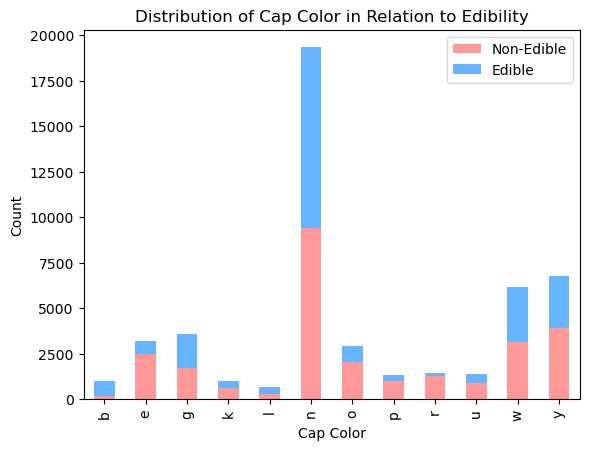

In [5]:
# Visualize some interesting features of the training set
plot_data_set(train_data)

## Pre-processing pipeline

This is the process of building a pipeline, training and applying data processing pipeline
This is used to preprocess the data before feeding it to the model

In [6]:
from pipelines import apply_pipeline, build_pipeline, save_pipeline, train_pipeline,load_pipeline
data = load_data()                               #loading data
train_set, test_set = split_train_test(data)                
# <ASSIGNMENT 3.4: Train and apply the pipeline>
pipeline = build_pipeline()                    #building the data processing pipeline
trained_pipeline = train_pipeline(pipeline, train_set)          #training the pipeline on the training set
save_pipeline(trained_pipeline)                    #save the pipeline into a file for further use
#Applying the pipeline to the training set and the testing set
X_train, y_train = apply_pipeline(trained_pipeline, train_set)        
X_test, y_test = apply_pipeline(trained_pipeline, test_set)



## Modeling

In this process we are building a model and perfoming cross validation and reporting the scores obtained from it.
This is to make sure that the model is robust

In [7]:
from models import build_model, cross_validate_model, save_model, train_model

# <ASSIGNMENT 3.7: Run cross-validation and report scores>
print("fetching the results...")
model = build_model()               #building the model
cv_scores = cross_validate_model(model,X_train,y_train)         #perfoming cross validation
print("Cross-validation scores:", cv_scores)            #Displaying the scores


fetching the results...
Cross-validation scores: [0.99877188 0.99948828 0.99979531 0.99938594 0.99948828]


## Model comparison

Hyper parameter tuning or fine tuning the model
Now, we will fine tune the model by searching for optimal hyper parameters.

In [8]:
from models import finetune_model

# Perform a search over model hyperparameters
print("finding the hyperparameters..")                  
best_params = finetune_model(build_model(), X_train, y_train)      #fine tuning the model by searching the best parameters
print("best params :",best_params)  

finding the hyperparameters..
Fitting 5 folds for each of 12 candidates, totalling 60 fits
best params : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 15}


Model training and evaluation using the confusion matrix
This is the process of training the model using the best parameters obtained from the previous tuning process. It then evaluates the model's performance by generating and displaying a confusion matrix

Training the model with the optimized parameters...


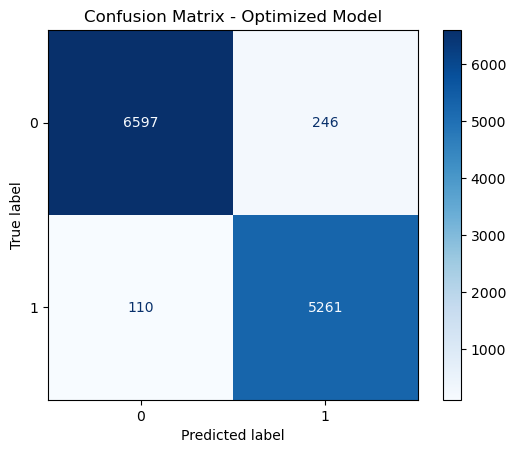

In [12]:
from models import build_model, evaluate_model, save_model, train_model
from visualizers import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#Selecting the hyperparameter, the model is trained using train model
#The trained model is saved using save_model
#Y_pred is the prediction made using the trained model on X_test.
# Confusion matrix is generated and displayed.
print("Training the model with the optimized parameters...")
optimized_model = build_model(params=best_params)
trained_model=train_model(optimized_model,X_train,y_train)
save_model(trained_model,"optimized_model.pkl")
y_pred =trained_model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
#Display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Optimized Model")
plt.show()
# <ASSIGNMENT 3.9: Train the optimized model and plot the confusion matrix>

Confusion matrix scores and recommendations


In [18]:
# <ASSIGNMENT 3.10: Interpret the confusion matrix and offer a recommendation>
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,f1_score,precision_score,recall_score
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
print("True Positive:",TP)
print("True Negative:",TN)
print("False Positive:",FP)
print("False Negative:",FN)
# Here we are calculating the scores from the confusion matrix.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

#Recommendations based on scores
Recommendation = """
Recommendations are :
1) Based on the high recall and high precision scores, we can say that the model is generally performing well.
2) 246 false positives represent a critical error, as non-edible mushrooms are classified as edible.
3) 110 false negatives indicate that edible mushrooms are classified as non-edible.
4) To reduce false negatives, we need to adjust the threshold. This may lead to overfitting the model but prioritizes safety.
5) The model should be trained periodically with new learnings.
6) Improving the quality of the dataset and increasing the dataset size is essential.
7) Given the critical nature of false positives, an alert system should be developed to warn users or provide additional information 
    when the model predicts an edible mushroom.
"""
print (Recommendation)

True Positive: 5261
True Negative: 6597
False Positive: 246
False Negative: 110
Accuracy: 0.9708531193712133
Precision: 0.955329580533866
Recall: 0.9795196425246695
F1 Score: 0.9672733958448244

Recommendations are :
1) Based on the high recall and high precision scores, we can say that the model is generally performing well.
2) 246 false positives represent a critical error, as non-edible mushrooms are classified as edible.
3) 110 false negatives indicate that edible mushrooms are classified as non-edible.
4) To reduce false negatives, we need to adjust the threshold. This may lead to overfitting the model but prioritizes safety.
5) The model should be trained periodically with new learnings.
6) Improving the quality of the dataset and increasing the dataset size is essential.
7) Given the critical nature of false positives, an alert system should be developed to warn users or provide additional information 
    when the model predicts an edible mushroom.



In [11]:
# <ASSIGNMENT 3.12: Prepare the notebook for presentation to the client by adding appropriate text and comments>